In [2]:
import sys
sys.path.append('/eos/user/l/lkoller/SWAN_projects/data analysis 2024/LyA/commands')

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Ltif import Lpicday
from PIL import Image
import time
from sklearn import datasets, metrics, svm
from joblib import dump, load
import csv

In [3]:
Im = Image.open('/eos/experiment/gbar/pgunpc/data/22_10_16/PCO-SwY_exp_1_us_1665906394.700.tif')
arr = np.array(Im)
thresh = np.average(arr) + 3*np.std(arr)
#arr[arr < thresh] = 0
fig = plt.figure(figsize = (20,20))
plt.imshow(arr, cmap = 'hot')
#plt.scatter([val[1] for val in data0['pos']], [val[0] for val in data0['pos']], s = 20)
#plt.scatter([data0['pos'][63][1]], [data0['pos'][63][0]])
plt.title('Run 408 nr 2: MCP5 picture with 409 measured clusters', fontsize = 13)
fig.patch.set_alpha(1.0)
#plt.savefig('/eos/user/l/lkoller/SWAN_projects/data analysis 2024/Data analysis/Figures/MCP5 images/run_408-nr_2-MCP5-clust_409-thresh_false.png', dpi = 300)

FileNotFoundError: [Errno 2] No such file or directory: '/eos/experiment/gbar/pgunpc/data/22_10_16/PCO-SwY_exp_1_us_1665906394.700.tif'

In [2]:
day = Lpicday('24_04_30')
df = day.clusters_data()

100%|██████████| 196/196 [00:21<00:00,  9.30it/s]


In [28]:
pos = 1
df.iloc[pos]['MCP5'], len(df.iloc[pos]['size'])

('/eos/experiment/gbar/pgunpc/data/24_04_30/PCO-SwY_exp_10_us_1714463820.533.tif',
 409)

[278, 812]


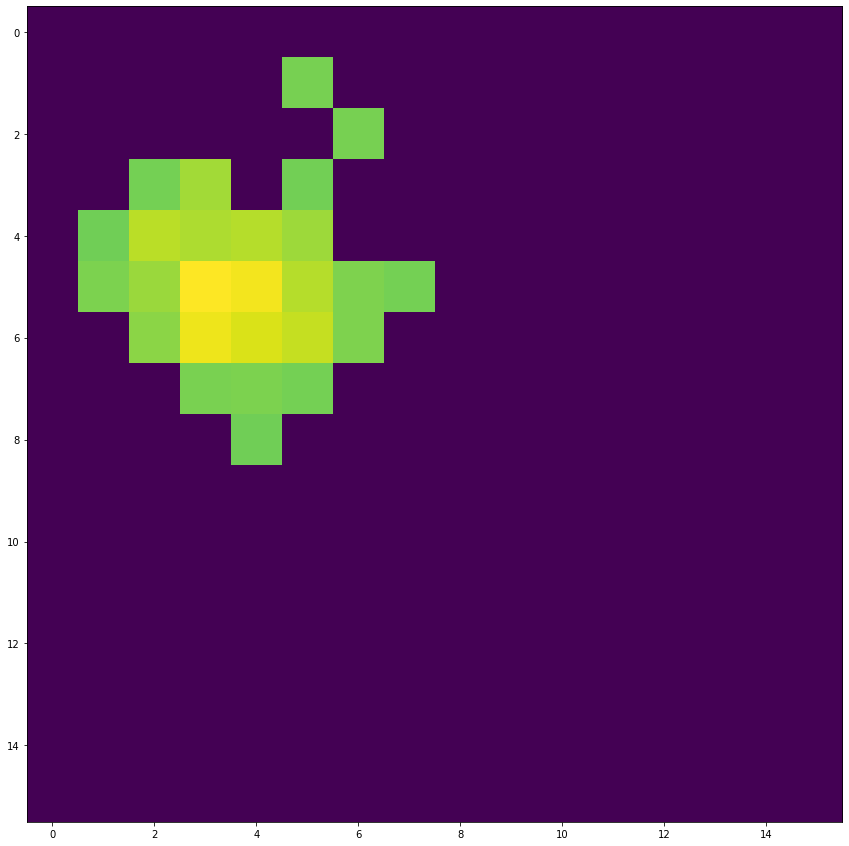

In [111]:
n = 60
print(data0['pos'][n])
plt.figure(figsize = (15,15))
plt.imshow(arr[data0['pos'][n][0] - 1:data0['pos'][n][0] + 15, data0['pos'][n][1] - 1:data0['pos'][n][1] + 15])

In [124]:
Imtot = Image.open(flist[0])
totarr = np.array(Imtot)
thr = np.average(totarr) + 3*np.std(totarr)
totarr[totarr < thr] = 0
for i in (flist[1:]):
    Im_temp = Image.open(i)
    arr_temp = np.array(Im_temp)
    thr = np.average(arr_temp) + 3*np.std(arr_temp)
    arr_temp[arr_temp < thr] = 0
    totarr += arr_temp

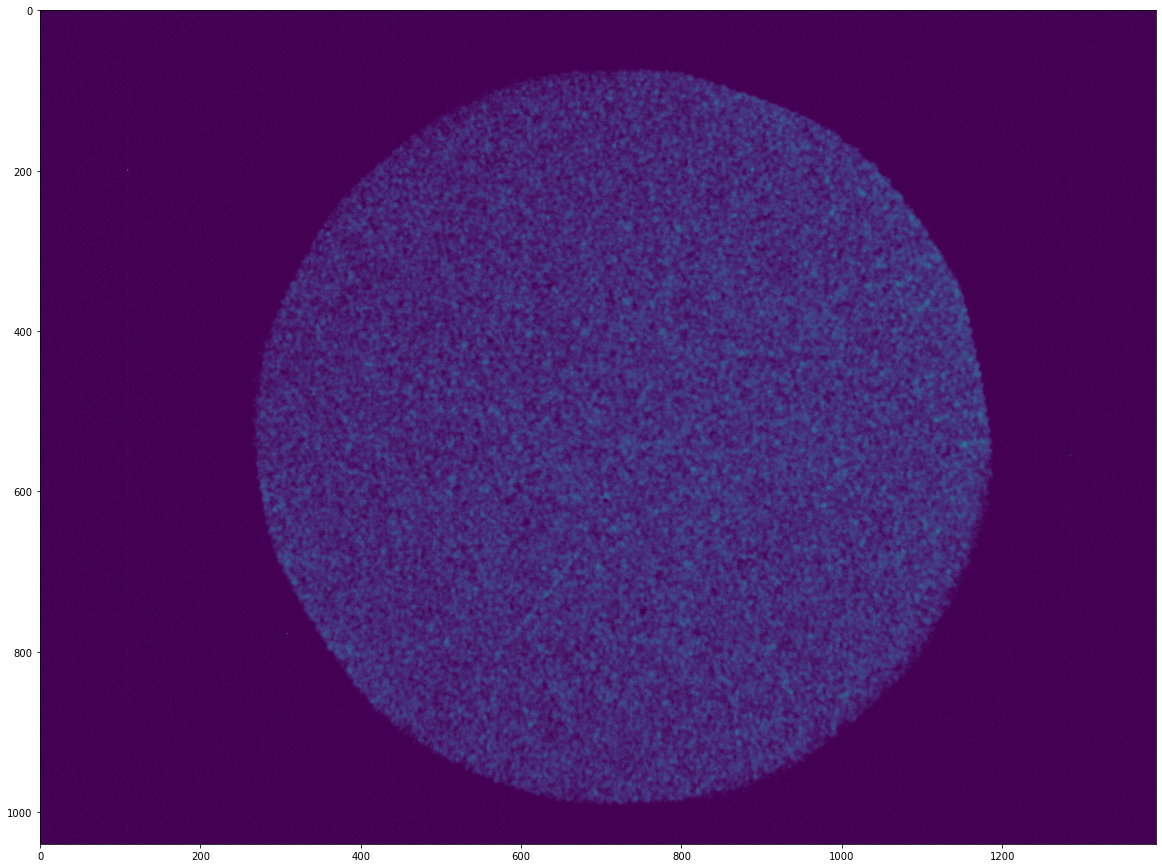

In [125]:
plt.figure(figsize = (20,20))
plt.imshow(totarr)

In [4]:
data0 = cdata.iloc[0]

In [5]:
data0[0]

'/eos/experiment/gbar/pgunpc/data/24_04_23/PCO-SwY_exp_10_us_1713862632.017.tif'

In [122]:
len(data0['cluster'][0])

53

In [139]:
cnum = np.array([len(val) for val in (list(cdata['cluster']))])

In [59]:
cnum[0]

342

In [140]:
cem = []
for i in range(len(cnum)):
    if cnum[i] < 100: 
        cem += [i]

In [141]:
fem = list(cdata['file'][cem])

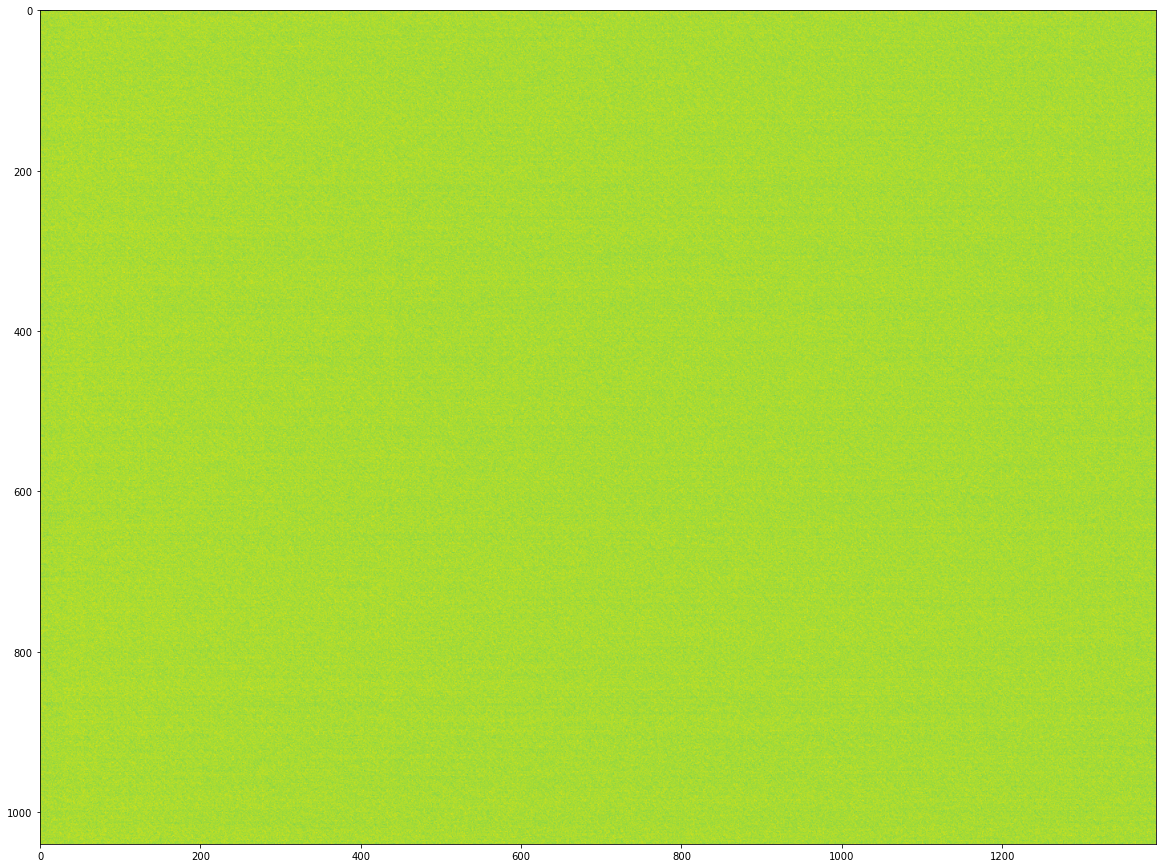

In [142]:
n = 0

Im_em = Image.open(fem[n])
arr_em = np.array(Im_em)
thresh_em = np.average(arr_em) + 3*np.std(arr_em)
#arr_em[arr_em < thresh_em] = 0
#arr_em = arr_em[50:1000,200:1200]
plt.figure(figsize = (20,20))
plt.imshow(arr_em)

In [56]:
np.average(arr), np.average(arr_em)

(810.3544168421053, 804.5219957894736)

In [11]:
help(Lpicday)

Help on class Lpicday in module Ltif:

class Lpicday(builtins.object)
 |  Lpicday(date)
 |  
 |  class to evaluate all the tif files from the MCP5 from a day
 |  
 |  Parameters
 |  ------------
 |  date = yy_mm_dd day for which we want to evaluate the files
 |  
 |  Methods defined here:
 |  
 |  __init__(self, date)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  clusters_data(self, min_size=5)
 |      save the data for the cluster from the current day into a textfile at /eos/user/l/lkoller/GBAR/data24/datasummary24/self.date/LyA_data
 |  
 |  clusters_day(self, min_size=5)
 |      Get the data for all the cluster from a day in a pandas dataframe
 |      
 |      Parameters
 |      ------------
 |      min_size = the minimum size a cluster has to be
 |      ran = int or tuple, if ran is an int, the corresponding cluster will be displayed, if ran is a list, then the clusters from ran[0] to ran[1] - 1 will be displayed
 |      
 |      Returns
 |      --